# Table of Contents
```
1. Business Understanding
   1.1. Project Description
2. Data Understanding
   2.1. Import Libraries, Modules, Functions, Objects, etc.
   2.2. User Defined Functions (UDFs)
   2.3. Data Loading
   2.4. Exploratory Data Analysis (EDA)
        2.4.1. Understand the data with Descriptive Statistics on the raw data
3. Research
4. Data Preprocessing
5. Visualizations
   5.1. Solution 1: Building a custom visualization to implement the bar coloring
   5.2. Solution 2: Building a custom visualization to implement interactivity
```

# 1. Business Understanding

## 1.1. Project Description

**`Problem Statement`**: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This project is based on the paper written by Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this paper the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean.

<img src='data/Fig1.png' alt='Figure 1' style='width: 400px;' />
<h4 style="text-align: left;" markdown="1"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014): A bar chart with 95% confidence intervals representing the mean value over a dataset. <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Note the overlapping regions in 1992-1994. </h4>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.

`Solution 1: Build a custom visualization to implement bar coloring`
* A color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y-axis value of interest as a parameter or variable.

`Solution 2: Build a custom visualization to implement interactivity`
* Allow the user to interactively set a range of y-values they are interested in, and recolor the bars based on this (e.g., a y-axis band).

**`Type of the problem`**: Visualization - Bar chart with confidence intervals

**`Data source`**: Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 

**`Author`**: Balasubramanian Chandran

# 2. Data Understanding

## 2.1. Import Libraries, Modules, Functions, Objects, etc.

In [1]:
import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt

from scipy.stats           import sem, t, ttest_ind

## 2.2. User Defined Functions (UDFs)

In [2]:
###     Funtion for SOLUTION 1     ###
# Define a function to calculate the Mean Error
def mean_err(data):
    semval = sem(data)                               # Calculate the Standard Error of the Means
    tval   = t.ppf((1 + ci) / 2, (len(data) - 1))    # Calculate the T value at the Confidence Interval
    merr   = (semval * tval)                         # Calculate the Mean Error
    return merr

###     Functions for SOLUTION 2     ###
# Define a function to draw the base plot
def plot(df):
    dfT       = df.T
    merr      = mean_err(dfT)
    fig, ax   = plt.subplots()
    df_desc   = dfT.describe()
    err_range = pd.DataFrame([(df_desc.loc['mean'] + merr), (df_desc.loc['mean'] - merr)])
    return fig, ax, dfT, merr, err_range

# Define a function to update the plot with user inputs
def update(color = ['lightgray' for _ in range(4)]):
    ax.bar(range(1,5,1),
           [dfT[i].mean() for i in index],
           width    = 0.95,
           yerr     = merr,
           error_kw = dict(ecolor='black', lw=1, capsize=10, capthick=1),
           color    = color)
    plt.xticks(range(1,5,1), index)

# Define a function to recolor the bars by doing a t-test to check if the selected range is similar to the 95% confidence interval range of each mean 
def recolor(yrange):
    color = []
    for item in err_range:
        s, p = ttest_ind(err_range[item], yrange)
        color.append(((1 - p), 0, p, 0.9))
    update(color)

'''
# Interactive functionality code starts ...     
# Define a function to trace a click event
def onclick(event):
    global click_count
    global prev, level, yrange

    plt.cla()
    update()
    level = event.ydata
    plt.axhline(level, lw=1, c='gray', alpha=0.3)
    plt.gca().set_title('y = {} \n Click on the plot for the 2nd data point in the range...'.format(event.ydata), 
                        fontsize='small', color='blue')
    
    if click_count == 0:
        click_count += 1
        prev = level
    else:
        yrange = pd.Series([prev, level])
        plt.gca().set_title('Data for the years 2016 - 2019\nSelected range = [{}, {}]'.
                            format(yrange[0].astype('int'), yrange[1].astype('int')),
                            fontsize='xx-large', color='black', alpha = 0.8)
        click_count = 0
        recolor(yrange)
        plt.axhspan(prev, level, alpha=0.3, color='gray')
# ... Interactive functionality code ends
'''

def oninput(yval1, yval2):
    plt.axhline(yval1, lw=1,c='gray', alpha=0.3)
    yrange = np.array([yval1, yval2])
    plt.gca().set_title('Data for the years 2016 - 2019\nSelected range =  [{}, {}]'.
                        format(yrange[0].astype('int'), yrange[1].astype('int')),
                        fontsize='x-large', color='black', alpha=0.8)
    recolor(yrange)
    plt.axhspan(yval1, yval2, alpha=0.3, color='gray')

## 2.3. Data Loading

In [3]:
# Use the following data for this project - Draw random samples from a normal (Gaussian) distribution
np.random.seed(12345)
index = [2016,2017,2018,2019]
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                   index= index)

## 2.4. Exploratory Data Analysis (EDA)

### 2.4.1. Understand the data with Descriptive Statistics on the raw data

In [4]:
print('Dimensions of the dataset:')
print(df.shape, '\n')
df

Dimensions of the dataset:
(4, 3650) 



,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
2016,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
2017,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
2018,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
2019,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


# 3. Research

During this stage, a study on the type(s) of graphs/ charts/ plots to be used is determined. In this project, the bar chart with confidence interval is given as part of the problem statement itself. Hence, no stydy needs to be done.

# 4. Data Preprocessing

In [5]:
ci = 0.95                                            # Confidence Interval is 95%

# Create an array for the Mean values for the years 2016 - 2019
a_mean = (np.array(df.iloc[0,:]).mean(),             # for 2016
          np.array(df.iloc[1,:]).mean(),             # for 2017
          np.array(df.iloc[2,:]).mean(),             # for 2018
          np.array(df.iloc[3,:]).mean())             # for 2019

# Create an array for the Mean Errors for the years 2016 - 2019
a_merr = (mean_err(np.array(df.iloc[0,:])),          # for 2016
          mean_err(np.array(df.iloc[1,:])),          # for 2017
          mean_err(np.array(df.iloc[2,:])),          # for 2018
          mean_err(np.array(df.iloc[3,:])))          # for 2019

# 5. Visualizations

## 5.1. Solution 1: Building a custom visualization to implement bar coloring

Enter the Y-axis value:  41000


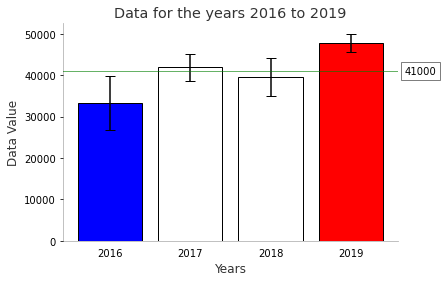

In [6]:
yval = input('Enter the Y-axis value: ')
yval = int(float(yval))
print('\n')

clr = []
for i, j in zip(a_mean, a_merr):
    if (i + j > yval) and (i - j > yval):
        clr.append("red")
    elif (i + j < yval) and (i - j < yval):
        clr.append("blue")
    else:
        clr.append("white")

fig = plt.figure()
ax  = fig.add_subplot(111)

ax.bar(x=(1, 2, 3, 4), 
       height=a_mean, 
       yerr=a_merr, 
       tick_label=["2016", "2017", "2018", "2019"],
       capsize=5,
       color=clr,
       edgecolor="black")

plt.title("Data for the years 2016 to 2019", fontsize="x-large", alpha=0.8)
ax.set_xlabel("Years", fontsize='large', alpha=0.8)
ax.set_ylabel("Data Value", fontsize='large', alpha=0.8)
ax.tick_params(left=True, top=False, right=False, bottom=False)
ax.axhline(yval, color="green", linewidth=1, alpha=0.6)
ax.text(1.02, yval, yval, va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_yaxis_transform())

# Remove the Outer frame from all 4 sides
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

# Set only the Left & Bottom frames visible
ax.spines['left'].set_visible(True)
ax.spines['left'].set_alpha(0.3)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

plt.show()    

###     CALCULATED VALUES FOR VERIFICATION     ###
# ----     ----------------     ----------------     -----------     -----------
# YEAR     MEAN                 MEAN ERROR (ME)      (MEAN + ME)     (M - ME)
# ----     ----------------     ----------------     -----------     -----------
# 92       33312.1074755443     6510.93801801402     39823.04549     26801.16946
# 93       41861.8595410733     3193.25484437759     45055.11439     38668.60470
# 94       39493.3049413988     4555.32959160197     44048.63453     34937.97535
# 95       47743.5509692670     2264.56129089468     50008.11226     45478.98968
# ----     ----------------     ----------------     -----------     -----------

## 5.2. Solution 2: Building a custom visualization to implement interactivity

Enter the 1st data point in the Y-axis range:  35000
Enter the 2nd data point in the Y-axis range:  41000


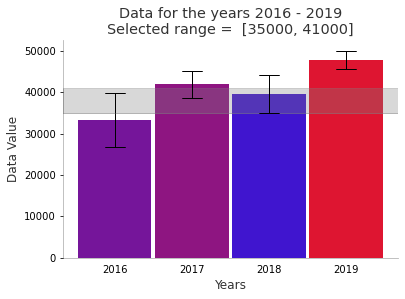

In [7]:
# Draw initial bar plot and get necessary data
click_count = 0
fig, ax, dfT, merr, err_range = plot(df)
update()

# Set X & Y axis labels and remove unwanted ticks
plt.gca().set_xlabel("Years", fontsize='large', alpha=0.8)
plt.gca().set_ylabel("Data Value", fontsize='large', alpha=0.8)
plt.gca().tick_params(left=True, top=False, right=False, bottom=False)

# Remove the Outer frame from all 4 sides
for spine in ax.spines:
    plt.gca().spines[spine].set_visible(False)

# Set only the Left & Bottom frames visible
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_alpha(0.3)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_alpha(0.3)

# Get the data point range from the user
yval1 = input('Enter the 1st data point in the Y-axis range: ')
yval1 = int(float(yval1))
yval2 = input('Enter the 2nd data point in the Y-axis range: ')
yval2 = int(float(yval2))
print('\n')

'''
# Interactive functionality code starts ...
# The below lines of codes would work if interactive notebook is enabled in JupyterLab 
plt.gca().set_title('Click on the plot for the 1st data point in the range...', 
                    fontsize='small', color='blue')
# Tell mpl_connect that we want to pass a 'button_press_event' onto onclick function when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)
# ... interactive functionality code ends
'''

oninput(yval1, yval2)